In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import quantstream as qs
import os
import xarray as xr

import sys

import dotenv


dotenv.load_dotenv("../.env")

sys.path.append("../")

FMP_API_KEY = os.getenv("FMP_API_KEY")


In [5]:
# inspect ac
qs.__dict__

{'__name__': 'quantstream',
 '__doc__': 'QuantStream: A Python library for financial data analysis and portfolio management.',
 '__package__': 'quantstream',
 '__loader__': <_frozen_importlib_external.SourceFileLoader at 0x10648fc50>,
 '__spec__': ModuleSpec(name='quantstream', loader=<_frozen_importlib_external.SourceFileLoader object at 0x10648fc50>, origin='/Users/christianl/repos/quantstream/quantstream/__init__.py', submodule_search_locations=['/Users/christianl/repos/quantstream/quantstream']),
 '__path__': ['/Users/christianl/repos/quantstream/quantstream'],
 '__file__': '/Users/christianl/repos/quantstream/quantstream/__init__.py',
 '__cached__': '/Users/christianl/repos/quantstream/quantstream/__pycache__/__init__.cpython-311.pyc',
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in slices.",
  '__package__': '',
  '__loader__': _frozen_importlib.Builtin

In [6]:
qs.FinancialModelingPrep

quantstream.connectors.fmp_connector.FinancialModelingPrep

In [7]:
fmp = qs.FinancialModelingPrep(FMP_API_KEY)

In [8]:
fmp.api_key

'N8D8Ww66GenGwDjVVky0ioWWlJMboblF'

In [9]:
ds = fmp.get_daily("AAPL")

/Users/christianl/repos/quantstream/quantstream/connectors/data_modeling.py:65: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  col: xr.DataArray(raw_data[col], dims="time", coords={"time": index})
/Users/christianl/repos/quantstream/quantstream/connectors/data_modeling.py:65: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.time

In [10]:
ds

<xarray.FinDataset> Size: 201kB
Dimensions:           (time: 1258)
Coordinates:
  * time              (time) datetime64[ns] 10kB 2024-09-13 ... 2019-09-16
Data variables:
    open              (time) float64 10kB 223.6 222.5 221.5 ... 54.99 54.43
    high              (time) float64 10kB 224.0 223.6 223.1 ... 55.21 55.03
    low               (time) float64 10kB 221.9 219.8 217.9 ... 54.78 54.39
    close             (time) float64 10kB 222.5 222.8 222.7 ... 55.18 54.98
    adjClose          (time) float64 10kB 222.5 222.8 222.7 ... 53.89 53.39 53.2
    volume            (time) int64 10kB 35396922 37498225 ... 73545872 84632564
    unadjustedVolume  (time) int64 10kB 35396922 37498225 ... 73545872 84632564
    change            (time) float64 10kB -1.08 0.27 1.2 ... 0.4275 0.185 0.5425
    changePercent     (time) float64 10kB -0.483 0.1213 0.5419 ... 0.3455 1.01
    vwap              (time) float64 10kB 223.0 222.2 221.3 ... 55.04 54.71
    label             (time) <U16 81kB 'September 13, 24' ... 'September 16, 19'
    changeOverTime    (time) float64 10kB -0.00483 0.001213 ... 0.003455 0.0101

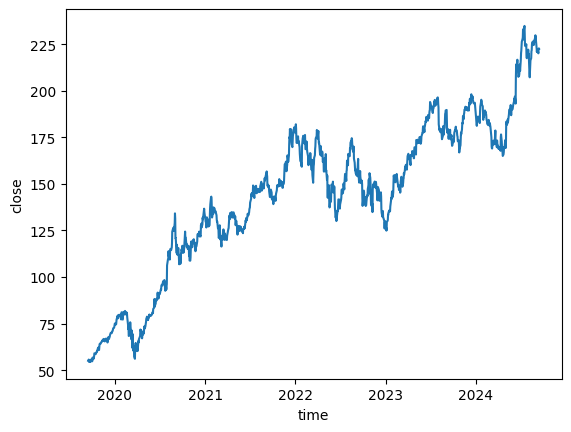

In [11]:
# plot the data
ds["close"].plot()

/Users/christianl/repos/quantstream/.venv/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


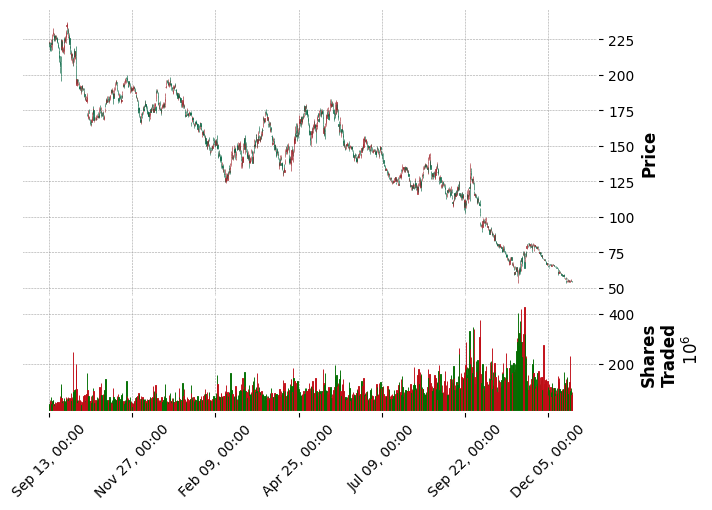

In [12]:
ds.plot_candlestick()

In [13]:
portfolio = xr.Dataset()

In [14]:
appl_ds = fmp.get_daily("AAPL")
msft_ds = fmp.get_daily("MSFT")
amzn_ds = fmp.get_daily("AMZN")
goog_ds = fmp.get_daily("GOOG")

/Users/christianl/repos/quantstream/quantstream/connectors/data_modeling.py:65: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  col: xr.DataArray(raw_data[col], dims="time", coords={"time": index})
/Users/christianl/repos/quantstream/quantstream/connectors/data_modeling.py:65: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.time

In [15]:
appl_ds

<xarray.FinDataset> Size: 201kB
Dimensions:           (time: 1258)
Coordinates:
  * time              (time) datetime64[ns] 10kB 2024-09-13 ... 2019-09-16
Data variables:
    open              (time) float64 10kB 223.6 222.5 221.5 ... 54.99 54.43
    high              (time) float64 10kB 224.0 223.6 223.1 ... 55.21 55.03
    low               (time) float64 10kB 221.9 219.8 217.9 ... 54.78 54.39
    close             (time) float64 10kB 222.5 222.8 222.7 ... 55.18 54.98
    adjClose          (time) float64 10kB 222.5 222.8 222.7 ... 53.89 53.39 53.2
    volume            (time) int64 10kB 35396922 37498225 ... 73545872 84632564
    unadjustedVolume  (time) int64 10kB 35396922 37498225 ... 73545872 84632564
    change            (time) float64 10kB -1.08 0.27 1.2 ... 0.4275 0.185 0.5425
    changePercent     (time) float64 10kB -0.483 0.1213 0.5419 ... 0.3455 1.01
    vwap              (time) float64 10kB 223.0 222.2 221.3 ... 55.04 54.71
    label             (time) <U16 81kB 'September 13, 24' ... 'September 16, 19'
    changeOverTime    (time) float64 10kB -0.00483 0.001213 ... 0.003455 0.0101

In [16]:
portfolio = qs.Portfolio()

In [17]:
portfolio.add_security("AAPL")
portfolio.add_security("MSFT")

/Users/christianl/repos/quantstream/quantstream/connectors/data_modeling.py:65: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  col: xr.DataArray(raw_data[col], dims="time", coords={"time": index})
/Users/christianl/repos/quantstream/quantstream/connectors/data_modeling.py:65: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.time

In [18]:
portfolio.data

<xarray.Dataset> Size: 252kB
Dimensions:           (security: 2, time: 1258)
Coordinates:
  * security          (security) object 16B 'AAPL' 'MSFT'
  * time              (time) datetime64[ns] 10kB 2024-09-13 ... 2019-09-16
Data variables:
    open              (security, time) float64 20kB 223.6 222.5 ... 137.0 135.8
    high              (security, time) float64 20kB 224.0 223.6 ... 137.5 136.7
    low               (security, time) float64 20kB 221.9 219.8 ... 136.4 135.7
    close             (security, time) float64 20kB 222.5 222.8 ... 137.4 136.3
    adjClose          (security, time) float64 20kB 222.5 222.8 ... 131.2 130.2
    volume            (security, time) float64 20kB 3.54e+07 ... 1.673e+07
    unadjustedVolume  (security, time) float64 20kB 3.54e+07 ... 1.673e+07
    change            (security, time) float64 20kB -1.08 0.27 1.2 ... 0.43 0.5
    changePercent     (security, time) float64 20kB -0.483 0.1213 ... 0.3681
    vwap              (security, time) float64 20kB 223.0 222.2 ... 137.1 136.1
    label             (security, time) object 20kB 'September 13, 24' ... 'Se...
    changeOverTime    (security, time) float64 20kB -0.00483 ... 0.003681

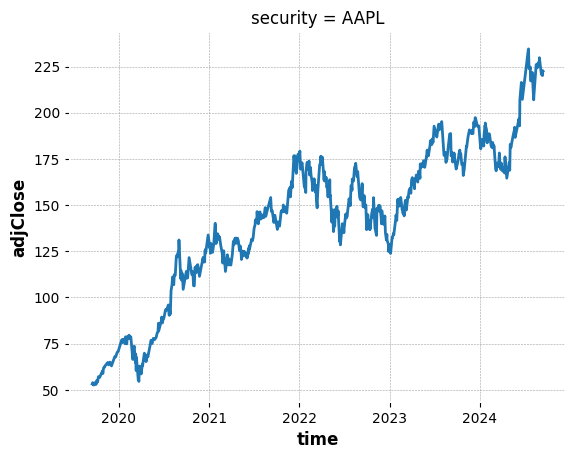

In [19]:
portfolio.data["adjClose"].sel(security="AAPL").plot()

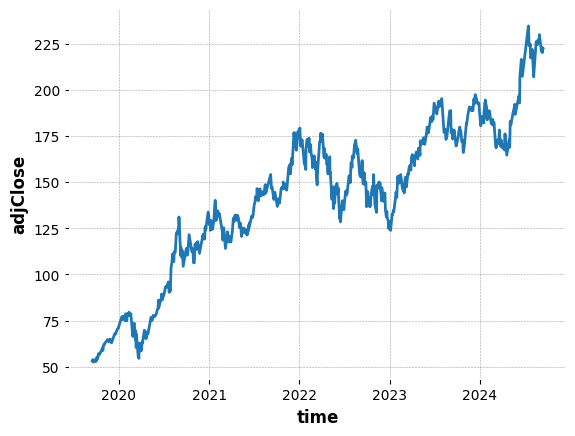

In [20]:
appl_ds["adjClose"].plot()

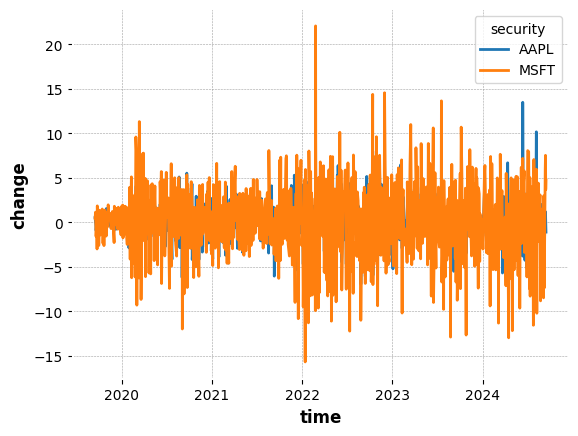

In [21]:
portfolio.data["change"].plot.line(x="time", hue="security")

In [22]:
portfolio.calculate_metrics()

In [23]:
portfolio.data

<xarray.Dataset> Size: 352kB
Dimensions:                  (security: 2, time: 1258)
Coordinates:
  * security                 (security) object 16B 'AAPL' 'MSFT'
  * time                     (time) datetime64[ns] 10kB 2024-09-13 ... 2019-0...
Data variables: (12/17)
    open                     (security, time) float64 20kB 223.6 222.5 ... 135.8
    high                     (security, time) float64 20kB 224.0 223.6 ... 136.7
    low                      (security, time) float64 20kB 221.9 219.8 ... 135.7
    close                    (security, time) float64 20kB 222.5 222.8 ... 136.3
    adjClose                 (security, time) float64 20kB 222.5 222.8 ... 130.2
    volume                   (security, time) float64 20kB 3.54e+07 ... 1.673...
    ...                       ...
    changeOverTime           (security, time) float64 20kB -0.00483 ... 0.003681
    cumulative_return        (security, time) float64 20kB 0.0 ... -0.6834
    avg_daily_return         (security, time) float64 20kB -0.0009131 ... -0....
    std_dev                  (security, time) float64 20kB 0.01994 ... 0.01915
    sharpe_ratio             (security, time) float64 20kB -0.04977 ... -0.04236
    annualized_sharpe_ratio  (security, time) float64 20kB -0.7901 ... -0.6724
Attributes:
    risk_free_rate:       0.02
    annual_trading_days:  252

In [24]:
portfolio.data["cumulative_return"].sel(security="AAPL").values

array([ 0.00000000e+00,  1.21348315e-03,  7.19101124e-04, ...,
       -7.49707865e-01, -7.52000000e-01, -7.52898876e-01])

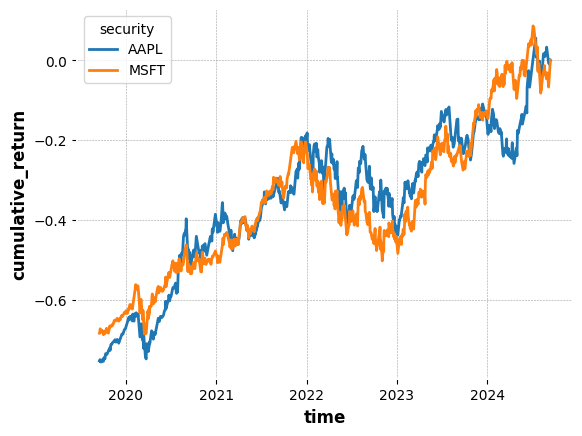

In [25]:
portfolio.plot_cumulative_returns()

In [28]:
qs.FinancialModelingPrep.get_quote.__doc__

'_summary_\n\n        Args:\n            symbol (_type_): _description_\n\n        Returns:\n            _type_: _description_\n        '